In [131]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import numpy as np

In [132]:
def filterdata(data,Filter):
    filtered_data=[]
    for row in data:
        b_append=True
        for k,v in Filter.items():
            key=label_dict[k]
            for vv in v:
                if abs(float(row[key]) - float(vv))>0.001:
                    b_append=False
        if b_append==True:
            filtered_data.append(row)
    return filtered_data

In [133]:
def plot(data,xlabel,ylabel,zlabel=None,Filter=None,Type=None):

    
    xlabel=label_dict[xlabel]
    ylabel=label_dict[ylabel]
    if zlabel!=None:
        zlabel=label_dict[zlabel]
   
    plt.figure()
    plt.ylabel(labels[ylabel])
    plt.xlabel(labels[xlabel])
    
    if Filter == None:
        filtered_data=data
        plt.title(labels[ylabel]+' - '+labels[xlabel])
    else:
        filtered_data=filterdata(data,Filter)
        title=labels[ylabel]+' - '+labels[xlabel]+', '
        for k,v in Filter.items():
            
            title=title+str(k)+'='+str(v)
        plt.title(title)
  
 

    
    if zlabel==None:
        dt={}
        x=[]
        y_mean=[]
        y_max=[]
        y_min=[]
        for i in range (0,len(filtered_data),1):
            y_value=filtered_data[i][ylabel]
            x_value=filtered_data[i][xlabel]
            if x_value in dt:
                dt[x_value].append(y_value)
            else:
                temp=[]
                temp.append(y_value)
                dt[x_value]=temp
        for k,v in dt.items():
            x.append(k)
            vnp=np.array(v).astype(np.float32)
            y_mean.append(np.median(vnp))
            y_max.append(np.max(vnp))
            y_min.append(np.min(vnp))
        xs, ymean_s = zip(*sorted(zip(x, y_mean)))
        xs, ymax_s = zip(*sorted(zip(x, y_max)))
        xs, ymin_s = zip(*sorted(zip(x, y_min)))
        plt.plot(xs, ymean_s)
        plt.fill_between(xs, ymin_s, ymax_s, alpha=0.3)

        
    else:
        iterating_items=possible_values[zlabel]
        for it in iterating_items:
            dt={}
            x=[]
            y_mean=[]
            y_max=[]
            y_min=[]
            for i in range (0,len(filtered_data),1):

                if abs(float(filtered_data[i][zlabel]) - float(it))<0.001:
                    y_value=filtered_data[i][ylabel]
                    x_value=filtered_data[i][xlabel]
                    if x_value in dt:
                        dt[x_value].append(y_value)
                    else:
                        temp=[]
                        temp.append(y_value)
                        dt[x_value]=temp
            for k,v in dt.items():
                x.append(k)
                vnp=np.array(v).astype(np.float32)
                y_mean.append(np.median(vnp))
                y_max.append(np.max(vnp))
                y_min.append(np.min(vnp))
            xs, ymean_s = zip(*sorted(zip(x, y_mean)))
            xs, ymax_s = zip(*sorted(zip(x, y_max)))
            xs, ymin_s = zip(*sorted(zip(x, y_min)))


            plt.plot(xs, ymean_s, label=labels[zlabel]+'='+str(it))
            plt.fill_between(xs, ymin_s, ymax_s, alpha=0.1)
    plt.legend(loc='best')
    if zlabel==None:
        plt.savefig(os.path.join('./graph', labels[xlabel]+'_'+labels[ylabel]+'.png'))
    else:
        plt.savefig(os.path.join('./graph', labels[xlabel]+'_'+labels[ylabel]+'_'+labels[zlabel]+'.png'))

    plt.show()
    plt.close()
    return xs,ymean_s


In [183]:
labels=["Episode","Steps","Reward","Time (in milliseconds)","cumulative Time","gamma"]
label_dict={"Episode":0,"Steps":1,"Reward":2,"Time (in milliseconds)":3,"cumulative Time":4,"gamma":5,}
#In the order of labels, ex. possible_values[0] corresponds to values of eps
possible_values=[[],[],[],[],[],[0.99,0.9,0.75]]

## Problem 1

In [144]:
PI_1_s= [l.split("\n")[0].split(",") for l in open(os.path.join('simple','1_PI.csv')).readlines()]
PI_1 = []
for each in PI_1_s:
    each_line=list(map(lambda x: float(x), each))
    PI_1.append(each_line)


No handles with labels found to put in legend.


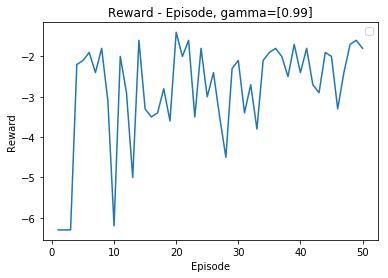

((1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0),
 (-6.3,
  -6.3,
  -6.3,
  -2.2,
  -2.1,
  -1.9,
  -2.4,
  -1.8,
  -3.1,
  -6.2,
  -2.0,
  -2.9,
  -5.0,
  -1.6,
  -3.3,
  -3.5,
  -3.4,
  -2.8,
  -3.6,
  -1.4,
  -2.0,
  -1.6,
  -3.5,
  -1.8,
  -3.0,
  -2.4,
  -3.5,
  -4.5,
  -2.3,
  -2.1,
  -3.4,
  -2.7,
  -3.8,
  -2.1,
  -1.9,
  -1.8,
  -2.0,
  -2.5,
  -1.7,
  -2.4,
  -1.8,
  -2.7,
  -2.9,
  -1.9,
  -2.0,
  -3.3,
  -2.4,
  -1.7,
  -1.6,
  -1.8))

In [145]:
plot(PI_1,'Episode','Reward',Filter={'gamma':[0.99]})

In [160]:
VI_1_s= [l.split("\n")[0].split(",") for l in open(os.path.join('.','1_VI.csv')).readlines()]
VI_1 = []
for each in VI_1_s:
    each_line=list(map(lambda x: float(x), each))
    VI_1.append(each_line)

No handles with labels found to put in legend.


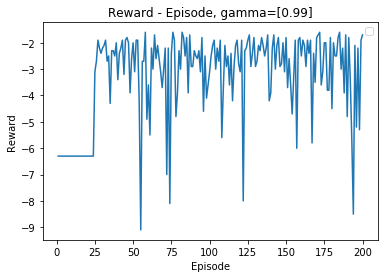

In [161]:
[xs,ys]=plot(VI_1,'Episode','Reward',Filter={'gamma':[0.99]})

In [153]:
Q_1_s= [l.split("\n")[0].split(",") for l in open(os.path.join('simple','1_Q.csv')).readlines()]
Q_1 = []
for each in Q_1_s:
    each_line=list(map(lambda x: float(x), each))
    Q_1.append(each_line)

No handles with labels found to put in legend.


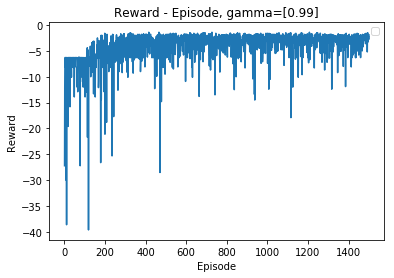

In [154]:
[xs,ys]=plot(Q_1,'Episode','Reward',Filter={'gamma':[0.99]})

## Problem 1 complex

In [158]:
Q_1_s= [l.split("\n")[0].split(",") for l in open(os.path.join('complex','1_Q.csv')).readlines()]
Q_1 = []
for each in Q_1_s:
    each_line=list(map(lambda x: float(x), each))
    Q_1.append(each_line)

No handles with labels found to put in legend.


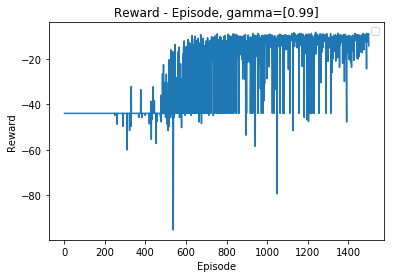

In [159]:
[xs,ys]=plot(Q_1,'Episode','Reward',Filter={'gamma':[0.99]})

No handles with labels found to put in legend.


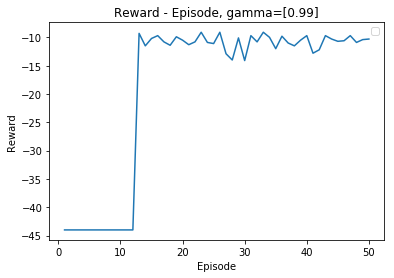

((1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0),
 (-44.0,
  -44.0,
  -44.0,
  -44.0,
  -44.0,
  -44.0,
  -44.0,
  -44.0,
  -44.0,
  -44.0,
  -44.0,
  -44.0,
  -9.3,
  -11.5,
  -10.2,
  -9.7,
  -10.8,
  -11.4,
  -9.9,
  -10.5,
  -11.3,
  -10.8,
  -9.1,
  -10.9,
  -11.1,
  -9.1,
  -12.9,
  -14.0,
  -10.1,
  -14.1,
  -9.7,
  -10.8,
  -9.1,
  -10.0,
  -12.0,
  -9.8,
  -11.0,
  -11.5,
  -10.5,
  -9.7,
  -12.8,
  -12.2,
  -9.7,
  -10.3,
  -10.7,
  -10.6,
  -9.7,
  -10.9,
  -10.4,
  -10.3))

In [163]:
PI_1_s= [l.split("\n")[0].split(",") for l in open(os.path.join('complex','1_PI.csv')).readlines()]
PI_1 = []
for each in PI_1_s:
    each_line=list(map(lambda x: float(x), each))
    PI_1.append(each_line)
plot(PI_1,'Episode','Reward',Filter={'gamma':[0.99]})

## Problem 2

In [184]:
VI_2_s= [l.split("\n")[0].split(",") for l in open(os.path.join('simple','2_VI.csv')).readlines()]
VI_2 = []
for each in VI_2_s:
    each_line=list(map(lambda x: float(x), each))
    VI_2.append(each_line)

No handles with labels found to put in legend.


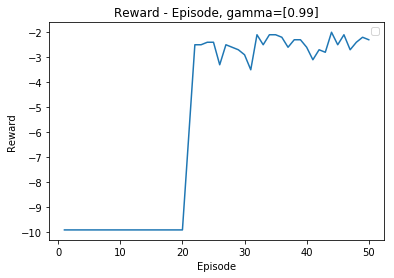

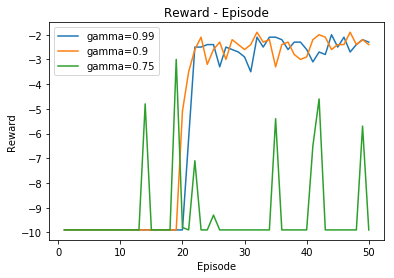

No handles with labels found to put in legend.


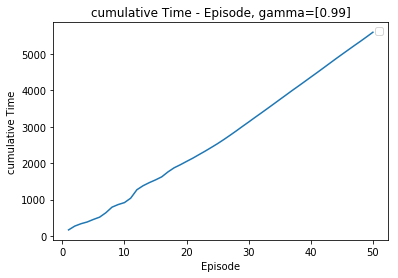

No handles with labels found to put in legend.


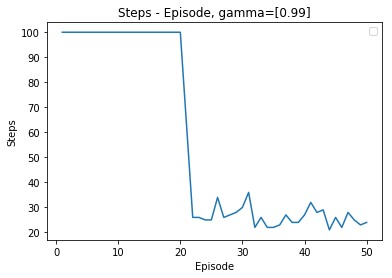

((1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0),
 (100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  63.0,
  26.0,
  26.0,
  25.0,
  25.0,
  34.0,
  26.0,
  27.0,
  28.0,
  30.0,
  36.0,
  22.0,
  26.0,
  22.0,
  22.0,
  23.0,
  27.0,
  24.0,
  24.0,
  27.0,
  32.0,
  28.0,
  29.0,
  21.0,
  26.0,
  22.0,
  28.0,
  25.0,
  23.0,
  24.0))

In [185]:
[xs,ys]=plot(VI_2,'Episode','Reward',Filter={'gamma':[0.99]})
[xs,ys]=plot(VI_2,'Episode','Reward','gamma')

plot(VI_2,'Episode','cumulative Time',Filter={'gamma':[0.99]})
plot(VI_2,'Episode','Steps',Filter={'gamma':[0.99]})

In [168]:
PI_2_s= [l.split("\n")[0].split(",") for l in open(os.path.join('simple','2_PI.csv')).readlines()]
PI_2 = []
for each in PI_2_s:
    each_line=list(map(lambda x: float(x), each))
    PI_2.append(each_line)

No handles with labels found to put in legend.


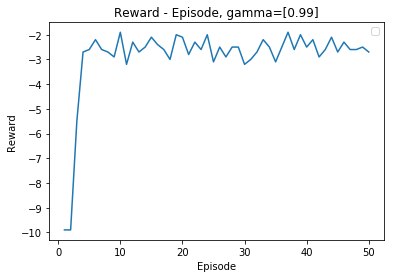

No handles with labels found to put in legend.


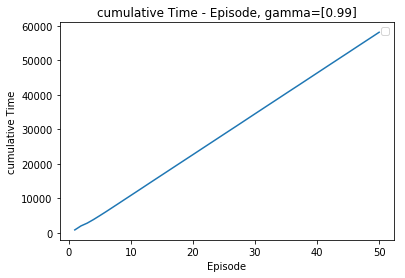

No handles with labels found to put in legend.


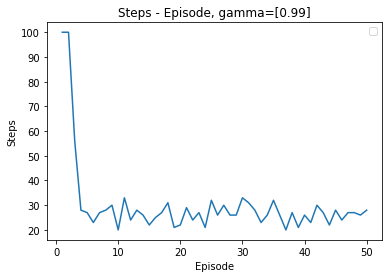

((1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0),
 (100.0,
  100.0,
  56.0,
  28.0,
  27.0,
  23.0,
  27.0,
  28.0,
  30.0,
  20.0,
  33.0,
  24.0,
  28.0,
  26.0,
  22.0,
  25.0,
  27.0,
  31.0,
  21.0,
  22.0,
  29.0,
  24.0,
  27.0,
  21.0,
  32.0,
  26.0,
  30.0,
  26.0,
  26.0,
  33.0,
  31.0,
  28.0,
  23.0,
  26.0,
  32.0,
  26.0,
  20.0,
  27.0,
  21.0,
  26.0,
  23.0,
  30.0,
  27.0,
  22.0,
  28.0,
  24.0,
  27.0,
  27.0,
  26.0,
  28.0))

In [179]:
[xs,ys]=plot(PI_2,'Episode','Reward',Filter={'gamma':[0.99]})
plot(PI_2,'Episode','cumulative Time',Filter={'gamma':[0.99]})
plot(PI_2,'Episode','Steps',Filter={'gamma':[0.99]})

No handles with labels found to put in legend.


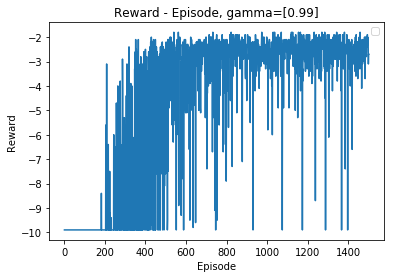

No handles with labels found to put in legend.


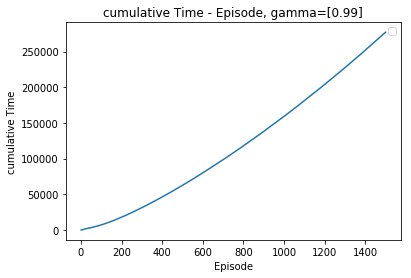

((1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0,
  51.0,
  52.0,
  53.0,
  54.0,
  55.0,
  56.0,
  57.0,
  58.0,
  59.0,
  60.0,
  61.0,
  62.0,
  63.0,
  64.0,
  65.0,
  66.0,
  67.0,
  68.0,
  69.0,
  70.0,
  71.0,
  72.0,
  73.0,
  74.0,
  75.0,
  76.0,
  77.0,
  78.0,
  79.0,
  80.0,
  81.0,
  82.0,
  83.0,
  84.0,
  85.0,
  86.0,
  87.0,
  88.0,
  89.0,
  90.0,
  91.0,
  92.0,
  93.0,
  94.0,
  95.0,
  96.0,
  97.0,
  98.0,
  99.0,
  100.0,
  101.0,
  102.0,
  103.0,
  104.0,
  105.0,
  106.0,
  107.0,
  108.0,
  109.0,
  110.0,
  111.0,
  112.0,
  113.0,
  114.0,
  115.0,
  116.0,
  117.0,
  118.0,
  119.0,
  120.0,
  121.0,
  122.0,
  123.0,
 

In [177]:
Q_2_s= [l.split("\n")[0].split(",") for l in open(os.path.join('simple','2_Q.csv')).readlines()]
Q_2 = []
for each in Q_2_s:
    each_line=list(map(lambda x: float(x), each))
    Q_2.append(each_line)
[xs,ys]=plot(Q_2,'Episode','Reward',Filter={'gamma':[0.99]})  
plot(Q_2,'Episode','cumulative Time',Filter={'gamma':[0.99]})